In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import KMeans
from scipy import stats
from scipy.spatial import distance
import random
random.seed(8888)
# KSE 
def euc_dis(p1,p2):
    a = p1.values
    b = p2.values
    c = np.vstack((a,b))
    dist = distance.pdist(c)
    return float(dist)
def KSE_Test(df, sample_size):
    # initiate two sample dfs, one distance matrix, and one kse score.
    # generate 2 random samples.
    sample1 = df.sample(n = sample_size, replace = False)
    sample2 = df.sample(n = sample_size, replace = False)
    kse_score = [] # empty list to store KSE scores
#   distance_matrix = np.matrix([[None] * int(len(df) * fraction) , 
#                               [None] * int(len(df) * fraction)])
#     distance_matrix = [[0 for x in range(len(sample1))] 
#                        for y in range(len(sample2))] 
    distance_matrix = np.zeros((sample_size, sample_size))
    # calculate distance from all points in sample1 to all points in sample2
    for i in range(0,sample_size):
        for j in range(0,sample_size):
            distance_matrix[i][j] = euc_dis(sample1.iloc[i,],sample2.iloc[j,])
    # calculate average KS-score for each instance in df.
    for i in range(0, len(df)):
        observed_instance = df.iloc[i,]
        distance_array = [0] * sample_size
        for j in range(0,sample_size):
            distance_array[j] = euc_dis(observed_instance,sample2.iloc[j,])
        sum = 0
        for k in range(0, sample_size):
            ks_score = stats.ks_2samp(distance_array, distance_matrix[k])[0]
            sum += ks_score
        average = sum/sample_size
        #kse_score[i] = average
        kse_score.append((i, average))
#         if (i%1000 == 0):
#             print('loop %s' % i)
    print("done")
    return kse_score 

def iForest(df):
    clf = IsolationForest(max_samples=1000, contamination=0.05,random_state= 5, bootstrap=False)
    clf.fit(df)
    y_pred = clf.predict(df)
    anomalies = df[y_pred == -1]
    return anomalies

def LOF(df):
    clf = LocalOutlierFactor(n_neighbors=20, contamination = 0.05)
    y_pred = clf.fit_predict(df)
    anomalies = df[y_pred == -1]
    return anomalies

def final_result(anom_df):
    kse_result = KSE_Test(anom_df, int(0.5 * len(anom_df)))
    index_anom = [] 
    for i in kse_result:
        if i[1] > 0.3:
            index_anom.append(i[0])
    # final result is a data set of the anomalies of the anomalies
    final = anom_df.iloc[index_anom]
    return final

In [2]:
mon_normalized = pd.read_csv('~/Desktop/data/normalized/data02_13_morning_Pages_normalized', sep = ',')[["bytes","pkts","dur","rate"]]
tue_normalized = pd.read_csv('~/Desktop/data/normalized/data02_14_morning_Pages_normalized', sep = ',')[["bytes","pkts","dur","rate"]]
wed_normalized = pd.read_csv('~/Desktop/data/normalized/data02_15_morning_Pages_normalized', sep = ',')[["bytes","pkts","dur","rate"]]
thur_normalized = pd.read_csv('~/Desktop/data/normalized/data02_16_morning_Pages_normalized', sep = ',')[["bytes","pkts","dur","rate"]]
fri_normalized = pd.read_csv('~/Desktop/data/normalized/data02_17_morning_Pages_normalized', sep = ',')[["bytes","pkts","dur","rate"]]

## Anomalous data - iForest
mon_norm_anom = iForest(mon_normalized)
tue_norm_anom = iForest(tue_normalized)
wed_norm_anom = iForest(wed_normalized)
thur_norm_anom = iForest(thur_normalized)
fri_norm_anom = iForest(fri_normalized)

## Final results - iForest
mon_norm_final = final_result(mon_norm_anom)
tue_norm_final = final_result(tue_norm_anom)
wed_norm_final = final_result(wed_norm_anom)
thur_norm_final = final_result(thur_norm_anom)
fri_norm_final = final_result(fri_norm_anom)

done
done
done
done
done


In [3]:
## Anom data - LOF
mon_norm_anom_ = LOF(mon_normalized)
tue_norm_anom_ = LOF(tue_normalized)
wed_norm_anom_ = LOF(wed_normalized)
thur_norm_anom_ = LOF(thur_normalized)
fri_norm_anom_ = LOF(fri_normalized)
## Final results - LOF
mon_norm_final_ = final_result(mon_norm_anom_)
tue_norm_final_ = final_result(tue_norm_anom_)
wed_norm_final_ = final_result(wed_norm_anom_)
thur_norm_final_ = final_result(thur_norm_anom_)
fri_norm_final_ = final_result(fri_norm_anom_)

done
done
done
done
done


In [4]:
# Q3 Density plots
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)

/Users/ChineseSamurai/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


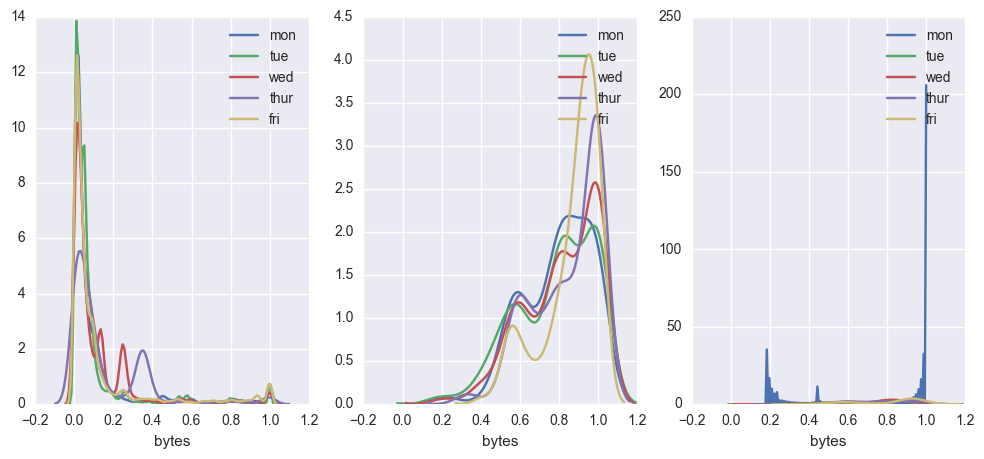

In [5]:
fig, (ax_1, ax_2, ax_3) = plt.subplots(1, 3, figsize=(12, 5))

sns.distplot(mon_normalized.bytes, label = 'mon', hist=False, ax = ax_1)
sns.distplot(tue_normalized.bytes, label = 'tue', hist=False, ax = ax_1)
sns.distplot(wed_normalized.bytes, label = 'wed', hist=False,ax = ax_1)
sns.distplot(thur_normalized.bytes, label = 'thur', hist=False,ax = ax_1)
sns.distplot(fri_normalized.bytes, label = 'fri', hist=False,ax = ax_1)

sns.distplot(mon_norm_anom.bytes, label = 'mon', hist=False, ax = ax_2)
sns.distplot(tue_norm_anom.bytes, label = 'tue', hist=False, ax = ax_2)
sns.distplot(wed_norm_anom.bytes, label = 'wed', hist=False,ax = ax_2)
sns.distplot(thur_norm_anom.bytes, label = 'thur', hist=False,ax = ax_2)
sns.distplot(fri_norm_anom.bytes, label = 'fri', hist=False,ax = ax_2)

sns.distplot(mon_norm_final.bytes, label = 'mon', hist=False, ax = ax_3)
sns.distplot(tue_norm_final.bytes, label = 'tue', hist=False, ax = ax_3)
sns.distplot(wed_norm_final.bytes, label = 'wed', hist=False, ax = ax_3)
sns.distplot(thur_norm_final.bytes, label = 'thur', hist=False,ax = ax_3)
sns.distplot(fri_norm_final.bytes, label = 'fri', hist=False,ax = ax_3)

ax_1.legend()
ax_2.legend()
ax_3.legend()

,bytes,pkts,dur,rate
544,0.239904,0.005579,0.000689,0.970780
640,0.239904,0.005452,0.000898,0.970781
744,0.178343,0.004053,0.000490,0.983960


In [72]:
mon_norm_final = final_result(mon_norm_anom)


done


In [73]:
len(mon_norm_final)

3

In [6]:
len(mon_norm_anom) / len(mon_normalized)

0.050204179678116745

In [5]:
len(mon_norm_anom_)

209

In [ ]:
# 1. look at descriptive statistics on those classified as outliers by iForest and those 
# not classified as outliers by iForest

## if we're just interested in the mean. Then four plots for four attributes, two lines in each
## plot for two iForest results, and non-iForest results.

In [30]:
# gives the datasets exclude anomalies identified by iForest.
mon_norm = mon_normalized[~mon_normalized.isin(mon_norm_anom)].dropna()
tue_norm = tue_normalized[~tue_normalized.isin(tue_norm_anom)].dropna()
wed_norm = wed_normalized[~wed_normalized.isin(wed_norm_anom)].dropna()
thur_norm = thur_normalized[~thur_normalized.isin(thur_norm_anom)].dropna()
fri_norm = fri_normalized[~fri_normalized.isin(fri_norm_anom)].dropna()

In [38]:
np.mean(mon_norm_anom)

bytes    0.795530
pkts     0.013677
dur      0.006563
rate     0.500233
dtype: float64

In [36]:
np.mean(mon_norm)

bytes    0.082764
pkts     0.000856
dur      0.000025
rate     0.977416
dtype: float64

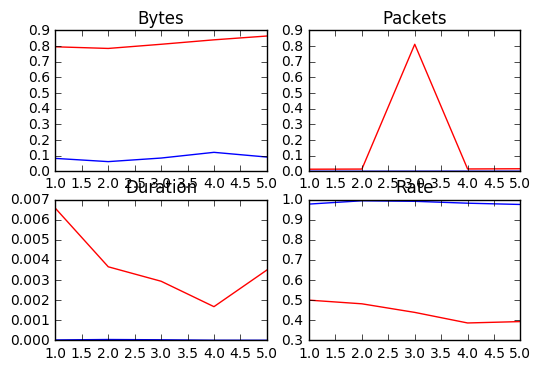

In [90]:
# for mean
fig = plt.figure()

ax1 = fig.add_subplot(221)
ax1.set_title("Bytes")
ax1.plot([1,2,3,4,5], [np.mean(mon_norm)[0],np.mean(tue_norm)[0],np.mean(wed_norm)[0],
                       np.mean(thur_norm)[0],np.mean(fri_norm)[0]], '-b', label='normal traffic')
ax1.plot([1,2,3,4,5], [np.mean(mon_norm_anom)[0],np.mean(tue_norm_anom)[0],np.mean(wed_norm_anom)[0],
                       np.mean(thur_norm_anom)[0],np.mean(fri_norm_anom)[0]], '-r', label = 'anomalous traffic')

ax2 = fig.add_subplot(222)
ax2.set_title("Packets")
ax2.plot([1,2,3,4,5], [np.mean(mon_norm)[1],np.mean(tue_norm)[1],np.mean(wed_norm)[1],
                       np.mean(thur_norm)[1],np.mean(fri_norm)[1]], '-b', label='normal traffic')
ax2.plot([1,2,3,4,5], [np.mean(mon_norm_anom)[1],np.mean(tue_norm_anom)[1],np.mean(wed_norm_anom)[0],
                       np.mean(thur_norm_anom)[1],np.mean(fri_norm_anom)[1]], '-r', label = 'anomalous traffic')

ax3 = fig.add_subplot(223)
ax3.set_title("Duration")
ax3.plot([1,2,3,4,5], [np.mean(mon_norm)[2],np.mean(tue_norm)[2],np.mean(wed_norm)[2],
                       np.mean(thur_norm)[2],np.mean(fri_norm)[2]], '-b', label='normal traffic')
ax3.plot([1,2,3,4,5], [np.mean(mon_norm_anom)[2],np.mean(tue_norm_anom)[2],np.mean(wed_norm_anom)[2],
                       np.mean(thur_norm_anom)[2],np.mean(fri_norm_anom)[2]], '-r', label = 'anomalous traffic')

ax4 = fig.add_subplot(224)
ax4.set_title("Rate")
ax4.plot([1,2,3,4,5], [np.mean(mon_norm)[3],np.mean(tue_norm)[3],np.mean(wed_norm)[3],
                       np.mean(thur_norm)[3],np.mean(fri_norm)[3]], '-b', label='normal traffic')
ax4.plot([1,2,3,4,5], [np.mean(mon_norm_anom)[3],np.mean(tue_norm_anom)[3],np.mean(wed_norm_anom)[3],
                       np.mean(thur_norm_anom)[3],np.mean(fri_norm_anom)[3]], '-r', label = 'anomalous traffic')

plt.show()


In [42]:
# 2. is LOF still a superset of iForest? (I thought LOF is a subset...) 
len(mon_norm_anom)

209

In [43]:
len(mon_norm_anom_)

209

In [9]:
len(set(mon_norm_anom.index.values).intersection(set(mon_norm_anom_.index.values)))

63

In [10]:
mon_norm_anom.sort('rate', ascending=0).head() 

/Users/ChineseSamurai/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,bytes,pkts,dur,rate
744,0.178343,0.004053,0.000490,0.983960
640,0.239904,0.005452,0.000898,0.970781
544,0.239904,0.005579,0.000689,0.970780
3789,0.440442,0.010733,0.000047,0.897717
2215,0.442699,0.010061,0.003312,0.896608


In [11]:
mon_normalized.sort('rate', ascending=0).head() 

/Users/ChineseSamurai/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,bytes,pkts,dur,rate
2865,0.001625,0.000035,5.740482e-08,0.999999
3671,0.001625,0.000035,5.740482e-08,0.999999
4037,0.001625,0.000035,5.740482e-08,0.999999
2932,0.002125,0.000008,8.862815e-09,0.999998
285,0.002250,0.000010,1.137646e-08,0.999997


In [36]:
len(set(mon_norm_anom.sort('bytes', ascending=0).head(209).index.values).intersection(set(mon_normalized.sort('bytes', ascending=0).head(209).index.values)))

/Users/ChineseSamurai/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


150

In [37]:
len(set(mon_norm_anom.sort('bytes', ascending=0).head(209).index.values).intersection(set(mon_normalized.sort('pkts', ascending=0).head(209).index.values)))

/Users/ChineseSamurai/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


145

In [34]:
len(set(mon_norm_anom.sort('bytes', ascending=0).head(209).index.values).intersection(set(mon_normalized.sort('dur', ascending=1).head(209).index.values)))

/Users/ChineseSamurai/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


42

In [32]:
len(set(mon_norm_anom.sort('bytes', ascending=0).head(209).index.values).intersection(set(mon_normalized.sort('rate', ascending=1).head(209).index.values)))

/Users/ChineseSamurai/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


150

In [40]:
len(set(mon_norm_anom.index.values).intersection(set(mon_normalized.sort('dur', ascending=0).head(209).index.values)))

/Users/ChineseSamurai/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


143

In [39]:
len(mon_norm_anom)

209

In [ ]:
len(set(mon_norm_anom.sort('bytes', ascending=0).head(209).index.values).intersection(set(mon_normalized.sort('dur', ascending=1).head(209).index.values)))

In [43]:
len(set(mon_norm_anom.index.values).difference(set(mon_normalized.sort('dur', ascending=0).head(209).index.values)))

/Users/ChineseSamurai/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


66

In [44]:
len(set(mon_norm_anom.index.values).intersection(set(mon_normalized.sort('dur', ascending=0).head(209).index.values)))

/Users/ChineseSamurai/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


143

In [46]:
ind = set(mon_norm_anom.index.values).difference(set(mon_normalized.sort('dur', ascending=0).head(209).index.values))

/Users/ChineseSamurai/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [47]:
mon_normalized.head()

,bytes,pkts,dur,rate
0,0.067843,0.001120,0.000003,0.997695
1,0.042088,0.000580,0.000002,0.999114
2,0.168074,0.003059,0.000013,0.985770
3,0.276972,0.001844,0.000213,0.960876
4,0.034854,0.000175,0.000002,0.999392


In [58]:
mon_normalized.iloc[list(ind),]

,bytes,pkts,dur,rate
3840,0.735828,0.000604,0.000034,0.677168
1920,0.999730,0.023250,0.000000,0.000000
2699,0.943690,0.000694,0.000022,0.330829
3212,0.738105,0.000570,0.000026,0.674685
2701,0.999688,0.024992,0.000000,0.000000
397,0.999878,0.015623,0.000000,0.000000
4111,0.999730,0.023250,0.000000,0.000000
398,0.999878,0.015623,0.000000,0.000000
4115,0.814541,0.000630,0.000030,0.580106
3348,0.900711,0.000683,0.000046,0.434418


In [ ]:
# no long is result the subset of another

In [44]:
# 3. KSE with iForest results
len(mon_norm_final)

3

In [45]:
len(mon_norm_final_)

87

In [46]:
len(set(mon_norm_anom.index.values).intersection(set(mon_norm_final_.index.values))) 

63

In [ ]:
# the above is interesting..

In [9]:
stats.ks_2samp([0,0,0,0,0], [1,1,1,1,1])

Ks_2sampResult(statistic=1.0, pvalue=0.0037813540593701006)

In [ ]:
stats.ks_2samp([0,0,0,0,0], [1,1,1,1,1])